In [ ]:
!pip3 install pip install tableprint

In [31]:
import numpy as np
import pandas as pd
import tableprint as tp
import pylab
import scipy.stats

In [22]:
# 1 Summary of Stat
ans = pd.DataFrame()
ans.index = ["Number of replicates (n)","Degrees of freedom (n-1)","Average (Mean)","Median","Minimum","Maximum","Standard Deviation","Standard Error","% Relative Standard Deviation"]
for year in ["2018","2019","2020","2021"]:
    thisYearData = pd.read_csv(f"{year}.csv")
    for col in ["Total","Orange","Brown"]:
        res = []
        raw = thisYearData[col]
        res.extend([len(raw),len(raw)-1,np.mean(raw),np.median(raw),np.min(raw),np.max(raw),np.std(raw, ddof=1),np.std(raw, ddof=1)/np.sqrt(len(raw)),np.std(raw, ddof=1)/len(raw)])
        ans[f"{year} {col}"]=res
ans.round(2)

,2018 Total,2018 Orange,2018 Brown,2019 Total,2019 Orange,2019 Brown,2020 Total,2020 Orange,2020 Brown,2021 Total,2021 Orange,2021 Brown
Number of replicates (n),61.00,61.00,61.00,57.00,57.00,57.00,52.00,52.00,52.00,65.00,65.00,65.00
Degrees of freedom (n-1),60.00,60.00,60.00,56.00,56.00,56.00,51.00,51.00,51.00,64.00,64.00,64.00
Average (Mean),10.08,4.74,5.33,10.00,5.32,4.68,10.38,5.52,4.87,10.42,5.46,4.95
Median,10.00,5.00,5.00,10.00,5.00,4.00,11.00,5.00,5.00,10.00,5.00,5.00
Minimum,7.00,2.00,2.00,7.00,2.00,0.00,6.00,2.00,2.00,9.00,1.00,1.00
Maximum,12.00,7.00,8.00,13.00,8.00,11.00,15.00,11.00,9.00,12.00,9.00,9.00
Standard Deviation,1.16,1.05,1.52,1.45,1.57,2.25,1.17,2.09,1.92,0.73,1.72,1.75
Standard Error,0.15,0.13,0.20,0.19,0.21,0.30,0.16,0.29,0.27,0.09,0.21,0.22
% Relative Standard Deviation,0.02,0.02,0.02,0.03,0.03,0.04,0.02,0.04,0.04,0.01,0.03,0.03


In [23]:
# Note that the F-test is extremely sensitive to non-normality of X and Y

### F-test:
H0: The variances of 2018 orange number and 2019 orange number are the same
HA: The variances of 2018 orange number and 2019 orange number are NOT the same

In [52]:
# https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/
O2018 = pd.read_csv("2018.csv")["Orange"]
O2019 = pd.read_csv("2019.csv")["Orange"]
f = np.var(O2019, ddof=1)/np.var(O2018, ddof=1) #Use the large mius the small
df1 = len(O2019)-1
df2 = len(O2018)-1
p_value = 1-scipy.stats.f.cdf(f, df1, df2) # Why 1-? Crosscheck with excel
print(f, p_value)

2.252098857007991 0.001134574530295196


Since p_value < 0.05, we rejected the H0. This means we do have enough evidence to say the variances are different. 
Thus, we use the t-test with 2 sample with different variance. 

### T-Test
H0: There is no difference between number of Orange Smarties from 2018 and 2019 
HA: There is difference between number of Orange Smarties from 2018 and 2019 

In [53]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
scipy.stats.ttest_ind(O2018, O2019, equal_var=0)

Ttest_indResult(statistic=-2.3346510746036433, pvalue=0.021632437280711053)

Since the p value is less than alpha (0.05), we reject H0. This means that we have enough evidence to conclude that the orange smarties from 2018 and 2019 are different in numbers.

### ANOVA
H0: There is NOT difference between brown Smarties across all 4 years
HA: There is difference between brown Smarties across all 4 years 

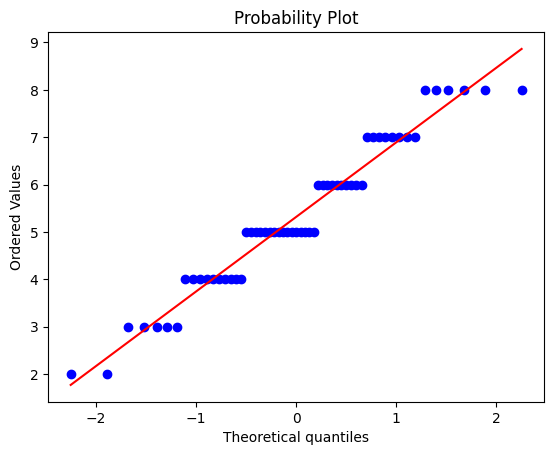

In [42]:
# https://towardsdatascience.com/anova-test-with-python-cfbf4013328b 
# Assume Normal?

In [55]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html No need for re-implement
B2018 = pd.read_csv("2018.csv")["Brown"]
B2019 = pd.read_csv("2019.csv")["Brown"]
B2020 = pd.read_csv("2020.csv")["Brown"]
B2021 = pd.read_csv("2021.csv")["Brown"]
scipy.stats.f_oneway(B2018, B2019, B2020, B2021)

F_onewayResult(statistic=1.2425856826559285, pvalue=0.2950135423301665)

Since the P-value is NOT less than Alpha (0.05), we failed to reject H0. Therefore we do not have enough evidence to conclue that the number of borwn smarties are different across years